In [2]:
import numpy as np
from scipy.optimize import fsolve
import random

meine_funktion = lambda x: x**3 - 6*x**2 + 11*x - 6

# Zufällige x-Werte für den Suchbereich
x_min = random.random() * -100  # Zufälliger negativer Wert
x_max = random.random() * 100   # Zufälliger positiver Wert

print(f"Suchbereich: {x_min:.2f} bis {x_max:.2f}")

# Startpunkte im x-Bereich (nicht Funktionswerte!)
startpunkte = np.linspace(x_min, x_max, 50)
nullstellen = []

for start in startpunkte:
    try:
        root = fsolve(meine_funktion, start)[0]
        # Duplikate vermeiden
        if not any(abs(root - existing) < 1e-6 for existing in nullstellen):
            nullstellen.append(root)
    except:
        pass

print(f"Gefundene Nullstellen: {sorted(nullstellen)}")

# Vergleich mit numpy.roots (exakte Lösung)
coeffs = [1, -6, 11, -6]
exakte_nullstellen = np.roots(coeffs)
print(f"Exakte Nullstellen: {sorted(exakte_nullstellen.real)}")

Suchbereich: -10.07 bis 1.38
Gefundene Nullstellen: [np.float64(1.0000000000000004)]
Exakte Nullstellen: [np.float64(1.0000000000000013), np.float64(1.999999999999995), np.float64(2.9999999999999996)]


u(10) = -20.94875
v(10) = -48.94932


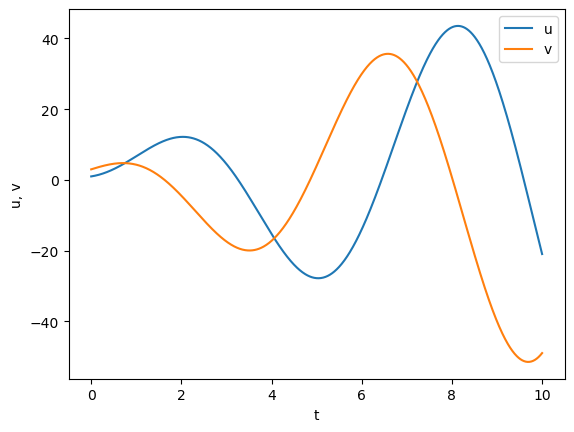

In [3]:
import numpy as np
from scipy.integrate import solve_ivp

def system(t, z):
    z1, z2, z3, z4 = z
    denom = (z1**2 + z3**2)**1.5
    dz1 = z2
    dz2 = z1 + 2*z4 - z1/denom
    dz3 = z4
    dz4 = z3 - 2*z2 - z3/denom
    return [dz1, dz2, dz3, dz4]

# Anfangsbedingungen
z0 = [1, 2, 3, 4]

# Intervall
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Lösen
sol = solve_ivp(system, t_span, z0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Werte bei t=10
u_10 = sol.y[0, -1]
v_10 = sol.y[2, -1]

print(f"u(10) = {u_10:.5f}")
print(f"v(10) = {v_10:.5f}")

# Plot (optional)
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[0], label='u')
plt.plot(sol.t, sol.y[2], label='v')
plt.legend()
plt.xlabel('t')
plt.ylabel('u, v')
plt.show()

In [4]:
import numpy as np
from math import exp

def newton(f, J, x0, tol=1.e-10):
    max_loops = 1000
    x = x0
    k = 0
    res = np.linalg.norm(f(x))
    while res > tol and k < max_loops:
        k += 1
        d = np.linalg.solve(J(x), f(x))
        x = x - d
        res = np.linalg.norm(f(x))
    return x, k

f = lambda x: np.array([-x[0]**3 + 3*x[1] - 2, x[1]*exp(x[0]) - 2])
J = lambda x: np.array([[-3*x[0]**2, 3], [x[1]*exp(x[0]) , exp(x[0])]])

print(newton(f, J, np.array([0.1, 0.1])))
print(newton(f, J, np.array([1, 1])))
print(newton(f, J, np.array([3, 0])))

(array([0.83948138, 0.86386895]), 13)
(array([0.83948138, 0.86386895]), 4)
(array([0.83948138, 0.86386895]), 6)


In [5]:
import numpy as np

def fehlerquadratsumme(x):
    x = np.array([1, 2, 3, 4])
    y = np.array([13, 35.5, 68, 110.5])
    for i in range(len(x)):
        result = 0
        result += (abs(y[i] - f_x(x[i])))**2
    return result

In [6]:
import numpy as np

A = np.array([[30, 100], [100, 354]])
y = np.array([730, 2535])

x = np.linalg.solve(A, y)
print(f"Lösung desGleichungssystems: x = {x}")
print(fehlerquadratsumme(x, y))

f_t1 = lambda t: x[0] * t + x[1] * t**2
print(fehlerquadratsumme(f_t1))

Lösung desGleichungssystems: x = [7.93548387 4.91935484]


TypeError: fehlerquadratsumme() takes 1 positional argument but 2 were given

In [9]:
import numpy as np

B = np.array([[1, 1], [2, 2**0.5], [3, 3**0.5], [4, 4**0.5]])
A = B.T @ B
f_x = np.array([13.0, 35.5, 68.0, 110.5])
y = B.T @ f_x

x = np.linalg.solve(A, y)
print(f"Lösung des Gleichungssystems: x = {x}")
print(fehlerquadratsumme(A, x, y))

f_t2 = lambda t: x[0] * t + x[1] * t**0.5


Lösung des Gleichungssystems: x = [ 44.90403982 -36.24883616]


In [1]:
def newton_1d(f, df, x0, tol=1e-10, max_iter=100):
    x = x0
    for k in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            print(f"Konvergenz nach {k} Schritten: x = {x}")
            return x
        if dfx == 0:
            print("Ableitung ist 0, Abbruch.")
            return None
        x = x - fx / dfx
        print(f"{k+1}: x = {x}, f(x) = {fx}")
    print("Maximale Iterationszahl erreicht.")
    return x

# Beispiel für sqrt(3):
f = lambda x: x**2 - 3
df = lambda x: 2*x
newton_1d(f, df, x0=1.5)

1: x = 1.75, f(x) = -0.75
2: x = 1.7321428571428572, f(x) = 0.0625
3: x = 1.7320508100147276, f(x) = 0.00031887755102077975
4: x = 1.7320508075688772, f(x) = 8.47267411785424e-09
Konvergenz nach 4 Schritten: x = 1.7320508075688772


1.7320508075688772

In [26]:
x = np.array([0, 1/6*np.pi, 1/2*np.pi, 5/6*np.pi, np.pi, 2*np.pi])
y = np.array([1, 2, 3, 2, 0, 0])

f = lambda x: p[0] + p[1]*np.sin(x)
A = np.array([[1, np.sin(x[0])],
              [1, np.sin(x[1])],
              [1, np.sin(x[2])],
              [1, np.sin(x[3])],
              [1, np.sin(x[4])],
              [1, np.sin(x[5])]])

print(A.T @ A)
print(A.T @ y.T)
p = np.linalg.solve(A.T @ A, A.T @ y.T)
print(p)

[[6.  2. ]
 [2.  1.5]]
[8. 5.]
[0.4 2.8]


In [29]:
b = np.array([13, 35.5, 68, 110.5]).T
A = np.array([[1, 1], [2, 4], [3, 9], [4, 16]])

x = np.linalg.solve(A.T @ A, A.T @ b)
print(x)

[7.93548387 4.91935484]


In [30]:
b = np.array([13, 35.5, 68, 110.5]).T
B = np.array([[1, 1], [2, 2**0.5], [3, 3**0.5], [4, 4**0.5]])

x = np.linalg.solve(B.T @ B, B.T @ b)
print(x)

[ 44.90403982 -36.24883616]
